In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import cm, rcParams
import scipy.constants as sc
from numba import njit
from scipy.optimize import newton
rcParams['figure.figsize'] = (4,2)

In [2]:
P = 300
R = np.logspace(np.log10(0.1), np.log10(400), P+1) # in au
c_s = 1.5 * R**(-0.25) # in km/s
Omega = (np.sqrt(sc.G * 2e30) * 1.5e11**(-1.5)) * R**(-1.5)
sdot = 2e-12 * (R/10)**(-1.5) # in g/cm2/s
sd = 30 * (1/R) # in g/cm2
rhos = 3.5 # in g/cm3
H = c_s / (1.5e8) / Omega # in au
H_R = c_s / Omega / (1.5e8) / R
u0 = np.sqrt(2*np.pi) / Omega * sdot / sd
rho0 = sd / np.sqrt(2*np.pi) / (c_s * 1e5) * Omega

In [4]:
def kH_R(R):
    c_s = 1.5 * R**(-0.25) # in km/s
    Omega = (np.sqrt(sc.G * 2e30) * 1.5e11**(-1.5)) * R**(-1.5)
    sdot = 2e-12 * (R/10)**(-1.5) # in g/cm2/s
    rhos = 3.5 # in g/cm3
    H_R = c_s / Omega / (1.5e8) / R
    k = sdot / rhos / Omega # in cm
    return k*H_R

#### Maximum $z$ reached

In [ ]:
a_min = 0.03 / 1e4 # minimum grain size in cm, input in microns
a_max = 1000 / 1e4 # maximum grain size in cm, input in microns
M = int(1e4) # number of grain sizes
a = np.logspace(np.log10(a_min), np.log10(a_max), M+1) # generate grain size list (log dist)N = 400

N = 400
z = np.linspace(0,10,N)

R = 10 # in au
c_s = 1.5 * R**(-0.25) # in km/s
Omega = (np.sqrt(sc.G * 2e30) * 1.5e11**(-1.5)) * R**(-1.5)
H = c_s / (1.5e8) / Omega # in au
H_R = c_s / Omega / (1.5e8) / R

gz = z / (1 + (H_R*z)**2)**1.5

ValueError: x and y must have same first dimension, but have shapes (1,) and (301,)

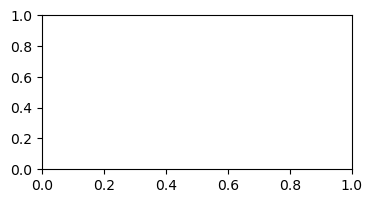

In [ ]:
k = sdot / rhos / Omega # in cm
grav_array = np.array([2**-0.5 / H_R, 2 * 3**-1.5 / H_R])
plt.plot(R, k/2.2e-5)
plt.plot(R, grav_array[1])

#### Maximum radius for which particular grain size settles

In [18]:
stellar_mass = 0.4 # in solar masses
R_out = 400

P = 300
R = np.logspace(np.log10(0.1), np.log10(R_out), P+1) # in au

p1 = -1
p2 = -1
r_c = 300 # in au
rhos = 3.5 # in g/cm3

Omega = (np.sqrt(sc.G * stellar_mass * 2e30) * 1.5e11**(-1.5)) * R**(-1.5)
H = 14 * (R / 100)**1.125 # in au
H_cm = H * 1.5e13 # in cm
H_R = H / R
c_s = Omega * H * 1.5e8 # in km/s

sdot = 1e-11 * (R/10)**(-1.5) # in g/cm2/s

c_s[np.argmin(np.abs(R-10))]

0.623591573910221

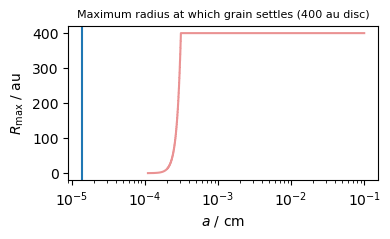

In [19]:
a_min = 0.03 / 1e4 # minimum grain size in cm, input in microns
a_max = 1000 / 1e4 # maximum grain size in cm, input in microns
M = int(1e4) # number of grain sizes
a = np.logspace(np.log10(a_min), np.log10(a_max), M+1) # generate grain size list (log dist)

k = sdot / rhos / Omega # in cm
idx_ls = [np.sum(k*H_R < (2 * i / 3**1.5)) for i in a]
max_radius = [R[s-1] for s in idx_ls if s > 0]

plt.plot(a[-len(max_radius):], max_radius, c='C3', alpha=0.5)
plt.xscale('log')
plt.ylabel(r'$R_\mathrm{max}$ / au')
plt.xlabel(r'$a$ / cm')
plt.title('Maximum radius at which grain settles (' + str(R_out) + ' au disc)', fontsize=8)
plt.axvline(1.4e-5)
# plt.xlim(4e-6, 2e-5)

#### At a given radius, the maximum grain size to escape

Text(0, 0.5, '$a_\\mathrm{esc}$ / cm')

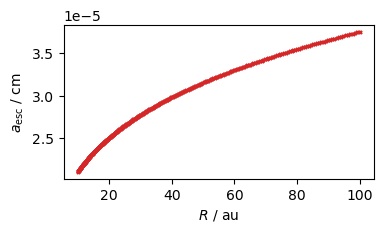

In [7]:
idx_ls_R = [np.sum(i > (2 * a / 3**1.5)) for i in (k*H_R)]
min_grain_size = [a[s-1] for s in idx_ls_R if s > 0]
plt.scatter(R, min_grain_size, marker='x', s=5, c='C3')
plt.plot(R, min_grain_size, c='C3', alpha=0.5)
plt.xlabel(r'$R$ / au')
plt.ylabel(r'$a_\mathrm{esc}$ / cm')

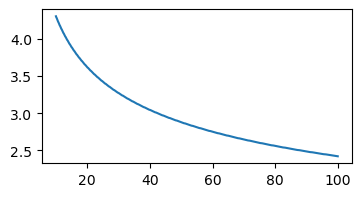

In [165]:
plt.plot(R, k/min_grain_size)

In [31]:
f = lambda z, k, a: k/a * (1 + H_R**2 * z**2) ** (3/2) - z
fdev = lambda z, k, a: k/a * 3 * (1 + (H_R*z)**2 ) ** 0.5 * H_R * z - 1

a = 1e-4

def fnewton(a):
    return newton(f, k/a, args=(k, a), fprime=fdev, maxiter=1000)

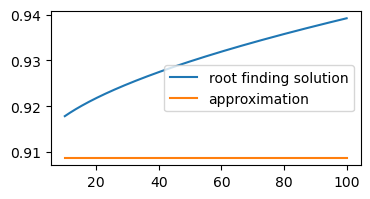

In [45]:
# plt.plot(R, fnewton(1e-1))
plt.plot(R, fnewton(1e-4), label='root finding solution')
plt.plot(R, k/1e-4, label='approximation')
# plt.yscale('log')
plt.legend()

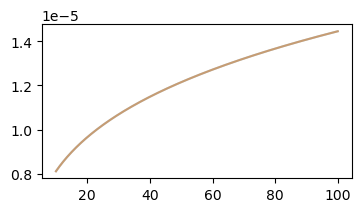

In [ ]:
R1 = np.logspace(np.log10(10), np.log10(100), P+1)
R2 = np.linspace(10, 100, P+1)
plt.plot(R1, kH_R(R1), c='C0', alpha=0.5)
plt.plot(R2, kH_R(R2), c='C1', alpha=0.5)

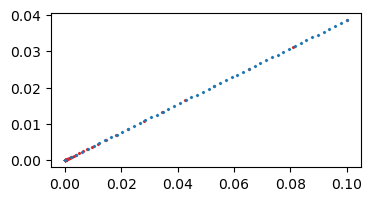

In [145]:
a1 = np.logspace(np.log10(a_min), np.log10(a_max), 50)
a2 = np.linspace(a_min, a_max, 50)

interval = 100
plt.scatter(a1, 2 * a1 / 3**1.5, marker='x', s=2, c='C3')
plt.scatter(a2, 2 * a2 / 3**1.5, marker='x', s=2, c='C0')
